<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/09_codelab6_scikitlearn_titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **해결문제**


---


타이타닉 탑승자 데이터를 기반으로 생존자 예측


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## 데이터불러오기

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/AIData/Pandas2022/data/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIData/Pandas2022/data/titanic/test.csv')

### 데이터 확인
+ PassengerId: 탑승자 데이터 일련번호
+ Survived: 생존여부, 0 = 사망, 1 = 생존
+ Name: 탑승자 이름
+ Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
+ Sex: 탑승자 성별
+ Age: 탑승자 나이
+ SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수
+ Parch: 같이 탑승한 부모님 또는 자녀 인원 수
+ Ticket: 티켓 번호
+ Fare: 요금
+ Cabin: 선실 번호
+ Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# Train 데이터 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Test 데이터 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 머신러닝 분석하기

+ 1) Train data를 테스트 셋과 트레이닝 셋을 나누기

In [ ]:
#테스트 셋과 트레이닝 셋을 나누기
from sklearn.model_selection import train_test_split

In [ ]:
train_data = train[['SibSp','Parch','Fare']]
train_target = train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, random_state=0)

+ 1) 모델 추가

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

+ 2) 파라미터를 결정하고 모델 객체 생성

In [ ]:
model_dic = {
    "Nearest Neighbors" : KNeighborsClassifier(3),
    "Linear SVM" : SVC(kernel="linear", C=0.025),
    "RBF SVM" : SVC(gamma=2, C=1),
    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree" : DecisionTreeClassifier(max_depth=5),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB(),
    "QDA" : QuadraticDiscriminantAnalysis()
}

+ 3) train 데이터셋을 이용하여 훈련(training) 및 예측(predict)

In [ ]:
model_p = {}

for key in model_dic.keys() :
  print(f'{key} : training')
  model_dic[key].fit(X_train, y_train)

  print(f'{key} : predict')
  model_p[key] = model_dic[key].predict(X_test)

Nearest Neighbors : training
Nearest Neighbors : predict
Linear SVM : training
Linear SVM : predict
RBF SVM : training
RBF SVM : predict
Gaussian Process : training
Gaussian Process : predict
Decision Tree : training
Decision Tree : predict
Random Forest : training
Random Forest : predict
Neural Net : training
Neural Net : predict
AdaBoost : training
AdaBoost : predict
Naive Bayes : training
Naive Bayes : predict
QDA : training
QDA : predict


In [ ]:
#결과를 데이터프레임으로 만들기 
model_pdf = pd.DataFrame(model_p)
model_pdf['y_test'] = list(y_test)
model_pdf

,Nearest Neighbors,Linear SVM,RBF SVM,Gaussian Process,Decision Tree,Random Forest,Neural Net,AdaBoost,Naive Bayes,QDA,y_test
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
218,0,0,0,0,0,0,0,0,0,1,0
219,1,1,1,1,1,1,1,1,1,1,1
220,0,0,0,0,0,0,0,0,0,0,0
221,1,1,1,1,0,1,1,1,1,1,1


+ 4) 모델 평가 : 정확도(accuracy) : 정답을 몇개 맞혔는지 백분율로 표시 (0~1사이)

In [ ]:
model_acc = {} 

for key in model_dic.keys() :
  model_acc[key] = model_dic[key].score(X_test, y_test)

In [ ]:
model_acc

{'AdaBoost': 0.7399103139013453,
 'Decision Tree': 0.7085201793721974,
 'Gaussian Process': 0.7040358744394619,
 'Linear SVM': 0.6995515695067265,
 'Naive Bayes': 0.7040358744394619,
 'Nearest Neighbors': 0.672645739910314,
 'Neural Net': 0.726457399103139,
 'QDA': 0.695067264573991,
 'RBF SVM': 0.7443946188340808,
 'Random Forest': 0.7354260089686099}

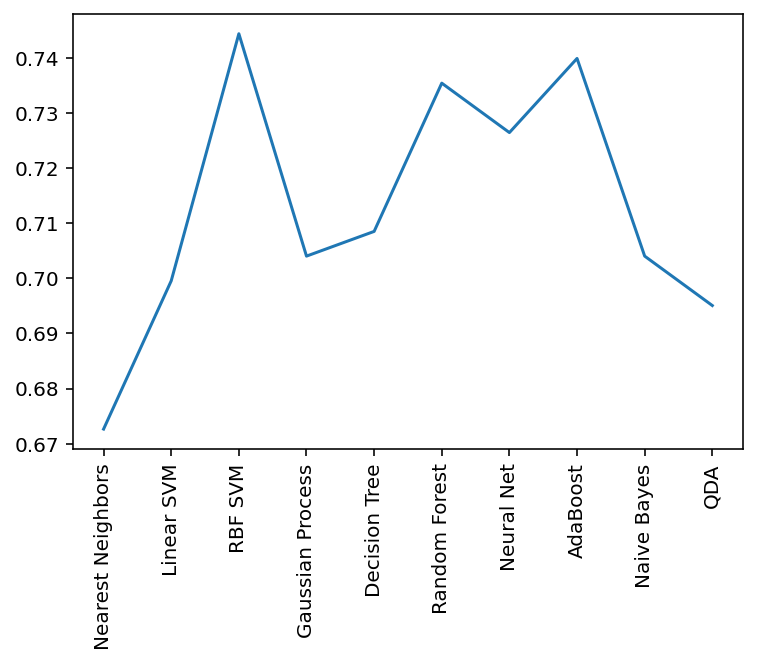

In [ ]:
plt.plot(list(model_acc.keys()), list(model_acc.values()))
plt.xticks(rotation=90)
plt.show() 